# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


# Basic Understanding of The Data

In [2]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
df.shape

(287, 25)

In [5]:
nums = []
cats = []

for col in df:
    if df[col].dtypes in ['int64','float64']:
        nums.append(col)
    else:
        cats.append(col)
        
nums_count = len(nums)
cats_count = len(cats)

print('Number of numerical columns:', nums_count)
print('Number of categorical columns:', cats_count)
print('-' * 70)
print('Numerical columns:', nums)
print('Categorical columns:', cats)

Number of numerical columns: 7
Number of categorical columns: 18
----------------------------------------------------------------------
Numerical columns: ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']
Categorical columns: ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']


In [6]:
check_items = []
for col in df.columns:
    check_items.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
df_desc = pd.DataFrame(data=check_items, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
df_desc

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Username,object,0,0.000000,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.000000,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.000000,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.000000,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.000000,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.000000,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.000000,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.000000,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.000000,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.000000,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


In [7]:
pd.set_option('display.max_rows', 5000)
for i in df.columns:
    if i not in 'CustomerID':
        print(f'''Value count kolom {i}:''')
        print(df[i].value_counts())
        print()

Value count kolom Username:
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
excludedPoultry2     1
cheerfulPear0        1
stressedMare5        1
obsessedCake8        1
mellowPudding2       1
giddyCod5            1
pridefulChamois9     1
dopeyGatorade1       1
aloofChile5          1
selfishDinosaur9     1
jumpyCaviar5         1
aboardUnicorn8       1
somberRelish9        1
spiritedDunbird4     1
jumpySeahorse6       1
joyfulCockatoo5      1
mercifulSmelt7       1
jubilantWildfowl6    1
insecureIcecream8    1
chicSalami4          1
hushedBobolink8      1
amazedRhino8         1
similarHeron2        1
troubledQuiche5      1
worldlyMackerel2     1
soreTruffle3         1
spiritedHeron5       1
affectedLemur7       1
wakefulPolenta7      1
betrayedHeron3       1
exactingBuck0        1
sugaryIcecream2      1
boastfulDinosaur8    1
jealousPlover2       1
similarCardinal3     1
peskyJaguar5         1
debonairChile3       1
worldl

In [8]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [9]:
df[cats].describe().T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


## Data Preparation

### Check Missing Value

In [10]:
df_prep = df.copy()

In [11]:
missing_count = df_prep.isnull().sum()

# Menghitung persentase missing value pada setiap kolom
missing_percentage = round((df_prep.isnull().sum() / len(df_prep)) * 100,2)

# Menggabungkan kedua Series ke dalam DataFrame
missing_df = pd.concat([missing_count, missing_percentage], axis=1)
missing_df.columns = ['Jumlah Missing Value', 'Persentase (%)']

# Menampilkan kolom-kolom yang memiliki nilai null beserta persentase missing valuenya
missing_df[missing_df['Jumlah Missing Value'] > 0]

,Jumlah Missing Value,Persentase (%)
SkorKepuasanPegawai,5,1.74
JumlahKeikutsertaanProjek,3,1.05
JumlahKeterlambatanSebulanTerakhir,1,0.35
JumlahKetidakhadiran,6,2.09
IkutProgramLOP,258,89.90
AlasanResign,66,23.00


In [12]:
# Mencari Nilai Null dengan Whitespace dalam DataFrame 
white_space = []
for col in df_prep.columns:
    for val in df_prep[col]:
        if isinstance(val, str) and '  ' in val:
            white_space.append(val)

# Output
print(white_space)

[]


1. **SkorKepuasanPegawai**: Terdapat 5 nilai null (1.74% dari total baris) pada kolom ini.
2. **JumlahKeikutsertaanProjek**: Terdapat 3 nilai null (1.05% dari total baris) pada kolom ini.
3. **JumlahKeterlambatanSebulanTerakhir**: Terdapat 1 nilai null (0.35% dari total baris) pada kolom ini.
4. **JumlahKetidakhadiran**: Terdapat 6 nilai null (2.09% dari total baris) pada kolom ini.
5. **IkutProgramLOP**: Terdapat 258 nilai null (89.9% dari total baris) pada kolom ini.
6. **AlasanResign**: Terdapat 66 nilai null (23.0% dari total baris) pada kolom ini.

Hasil tersebut menunjukkan jumlah nilai yang hilang (missing values) untuk setiap kolom dalam dataset, beserta persentase dari total baris dalam dataset. Kolom 'IkutProgramLOP' memiliki 258 missing values, yang merupakan 89.9% dari total baris, sedangkan kolom 'AlasanResign' memiliki 66 missing values, atau 23.0% dari total baris.

Selanjutnya, hasil tersebut juga menunjukkan bahwa tidak ada nilai yang hanya berupa spasi ganda (whitespace) untuk setiap kolom dalam dataset. Hal ini menunjukkan bahwa jika terdapat nilai kosong dalam dataset, nilai tersebut benar-benar kosong (null) dan bukan hanya spasi ganda.

### Handling Missing Values

In [13]:
df_prep['JumlahKetidakhadiran'].fillna(df_prep['JumlahKetidakhadiran'].median(), inplace=True)
df_prep['AlasanResign'].fillna(df_prep['AlasanResign'].mode()[0], inplace=True)
df_prep['SkorKepuasanPegawai'].fillna(0, inplace=True)
df_prep['JumlahKeikutsertaanProjek'].fillna(df_prep['JumlahKeikutsertaanProjek'].median(), inplace=True)
df_prep['JumlahKeterlambatanSebulanTerakhir'].fillna(df_prep['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df_prep['IkutProgramLOP'] = df_prep['IkutProgramLOP'].fillna(0)

### Handling Inconsistent Data

In [14]:
df_prep['StatusPernikahan'].replace(['-'], 'Belum_menikah', inplace=True)
df_prep['PernahBekerja'] = df_prep['PernahBekerja'].replace(1,'yes')

### Target

In [15]:
df_prep['Resigned'] = np.where(df_prep['TanggalResign']=='-', 0, 1)

In [16]:
df_prep['Resigned'].value_counts()

0    198
1     89
Name: Resigned, dtype: int64

### Drop Feature

In [17]:
df_prep.drop(['NomorHP', 'Email'], axis=1, inplace=True)

### Check Duplicate

In [18]:
print('There is',df_prep.duplicated().sum(),'duplicated value')

There is 0 duplicated value


kolom tidak memiliki duplikat

# EDA

In [19]:
df_eda = df_prep.copy()

In [20]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [21]:
cols_date = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
for kolom in cols_date:
    df_eda[kolom] = pd.to_datetime(df_eda[kolom], errors='coerce')

nums = []
cats = []
date = []

for column in df_eda :
  if df_eda[column].dtypes in ['int64', 'float64'] :
    nums.append(column)
  elif df_eda[column].dtypes in ['datetime64[ns]']:
    date.append(column)
  else :
    cats.append(column)

num_count = len(nums)
cat_count = len(cats)
date_count = len(date)

print('Number of numerical columns:', num_count)
print('Number of categorical columns:', cat_count)
print('Number of date columns:', date_count)
print('-' * 70)
print('Numerical columns:', nums)
print('Categorical columns:', cats)
print('Date columns:', date)

Number of numerical columns: 7
Number of categorical columns: 13
Number of date columns: 4
----------------------------------------------------------------------
Numerical columns: ['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']
Categorical columns: ['Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign', 'Resigned']
Date columns: ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']


- Terdapat 6 kolom numerik: 'EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', dan 'JumlahKetidakhadiran'.
- Terdapat 12 kolom kategorikal: 'Username', 'StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', dan 'AlasanResign'.
- Terdapat 4 kolom tanggal: 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', dan 'TanggalResign'.

## Univariate Analysis

### Numerical

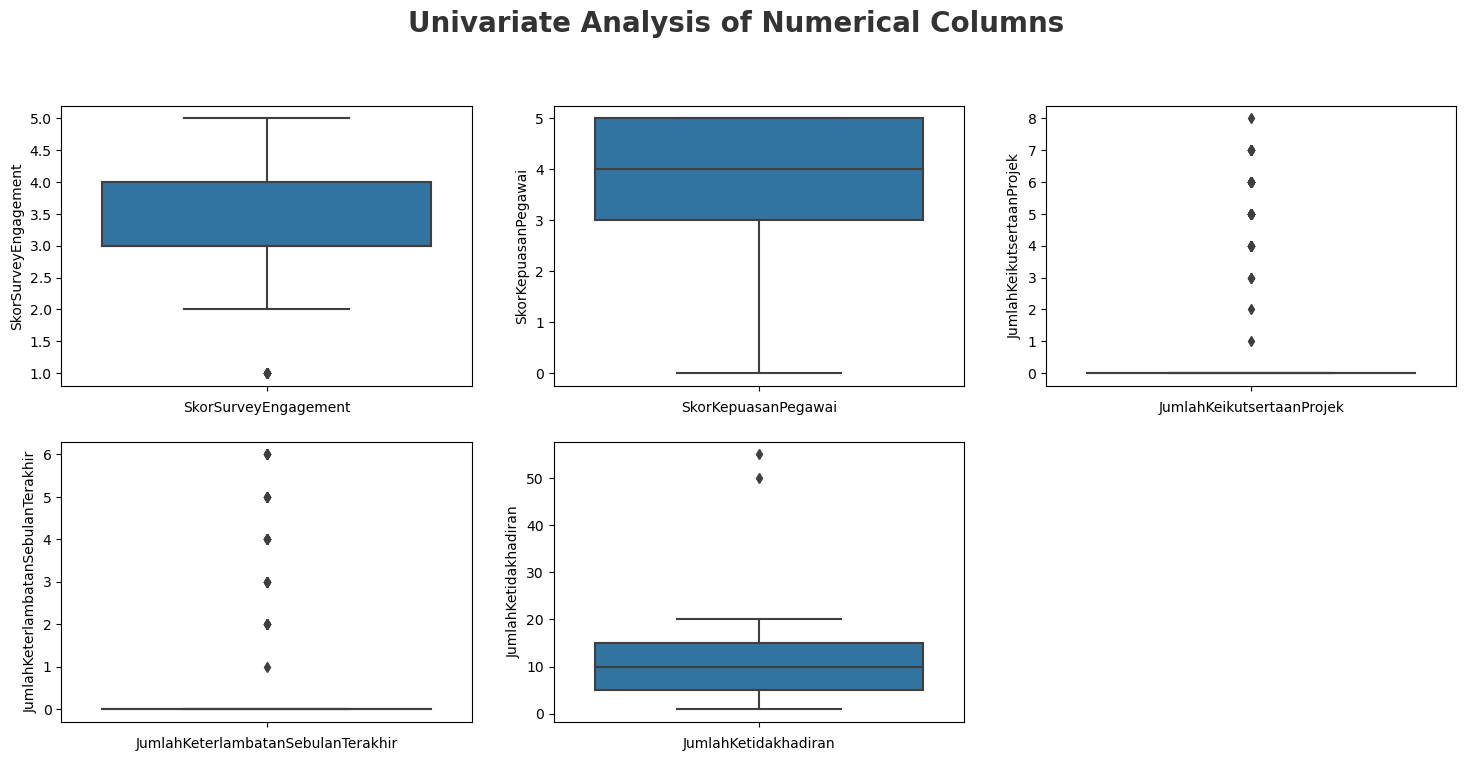

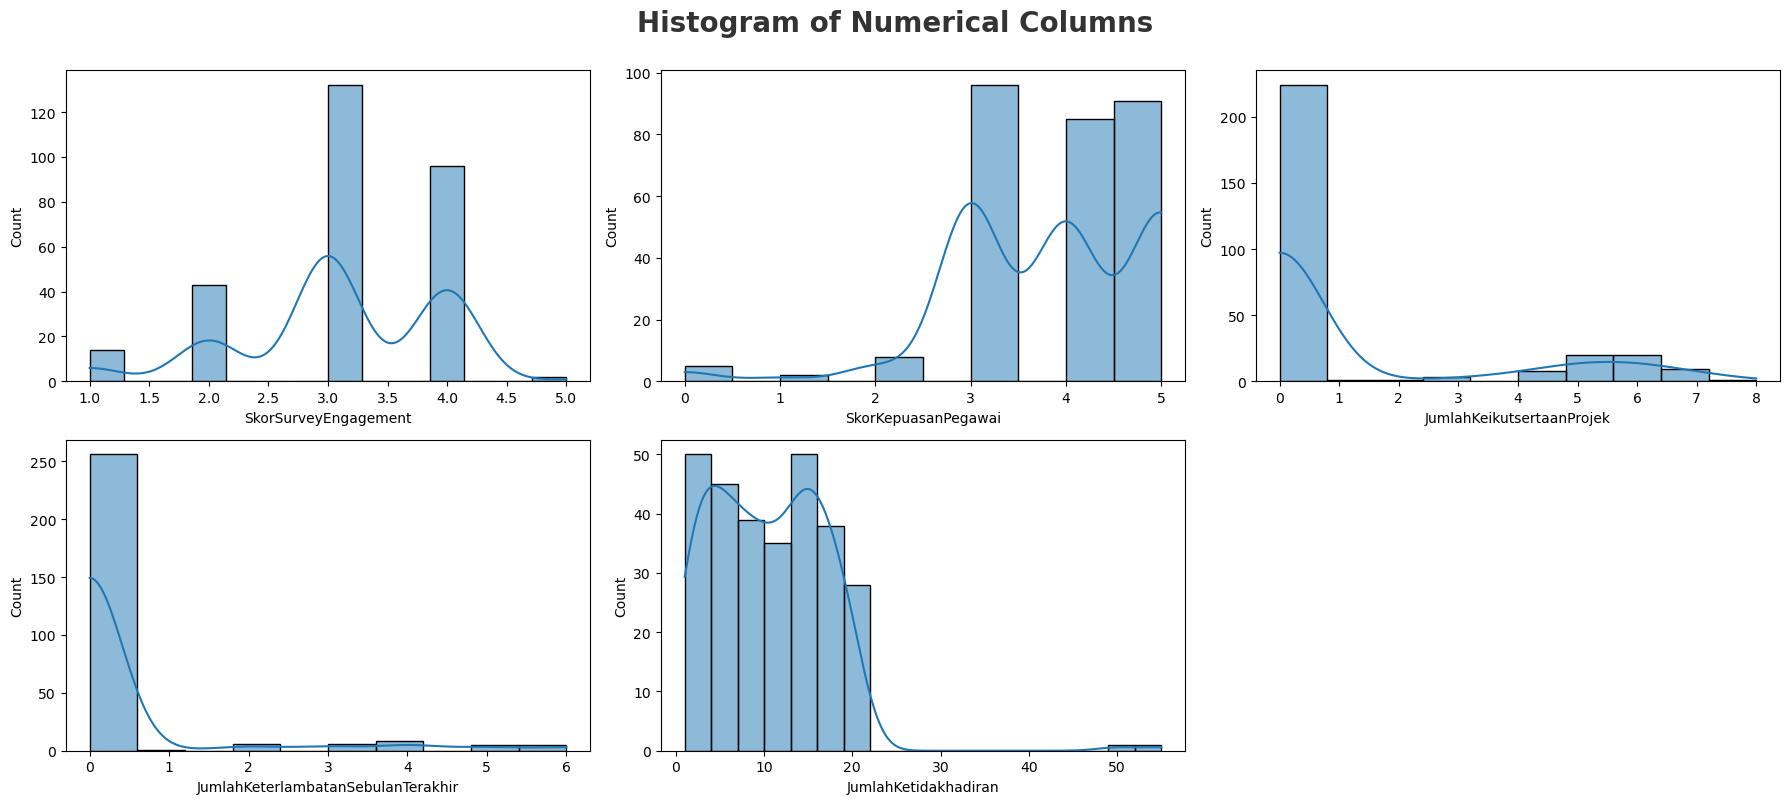

In [22]:
nums = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
plt.figure(figsize=(18, 8))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Boxplot
for i, col in enumerate(nums):
    plt.subplot(2, 3, i+1)  # Mengubah 3 menjadi 4 karena ada 7 kolom numerik
    sns.boxplot(y=df_eda[col])
    plt.xlabel(col)

plt.figure(figsize=(18, 8))
plt.suptitle('Histogram of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Histogram
for i, col in enumerate(nums):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_eda[col], kde=True)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Categorical

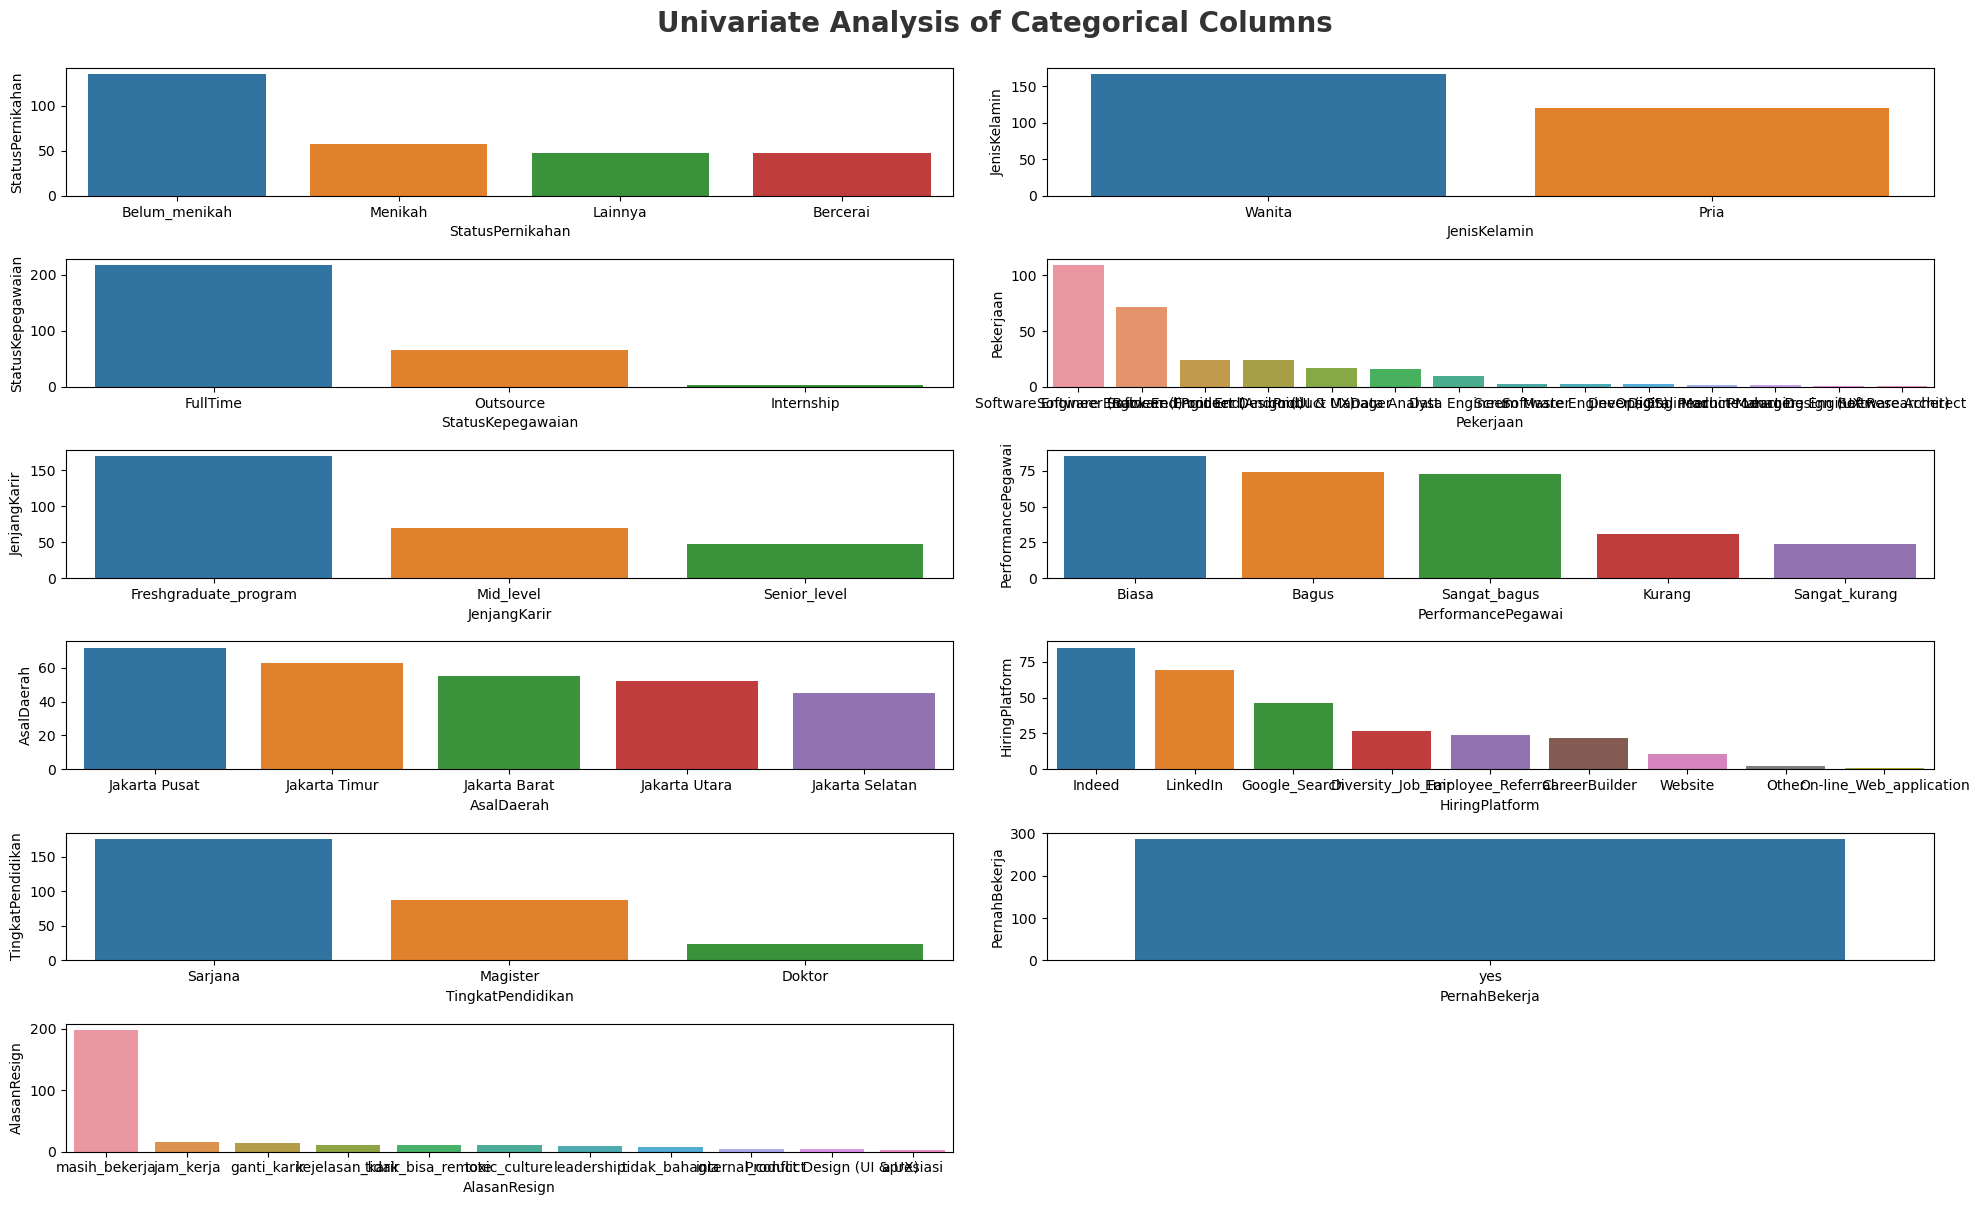

In [23]:
cats =  ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 
         'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
         'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']

plt.figure(figsize=(20, 12))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(cats):
    plt.subplot(6, 2, i+1)
    sns.barplot(x=df_eda[col].value_counts().index, y=df_eda[col].value_counts())
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Bivariate Analysis

### Numerical

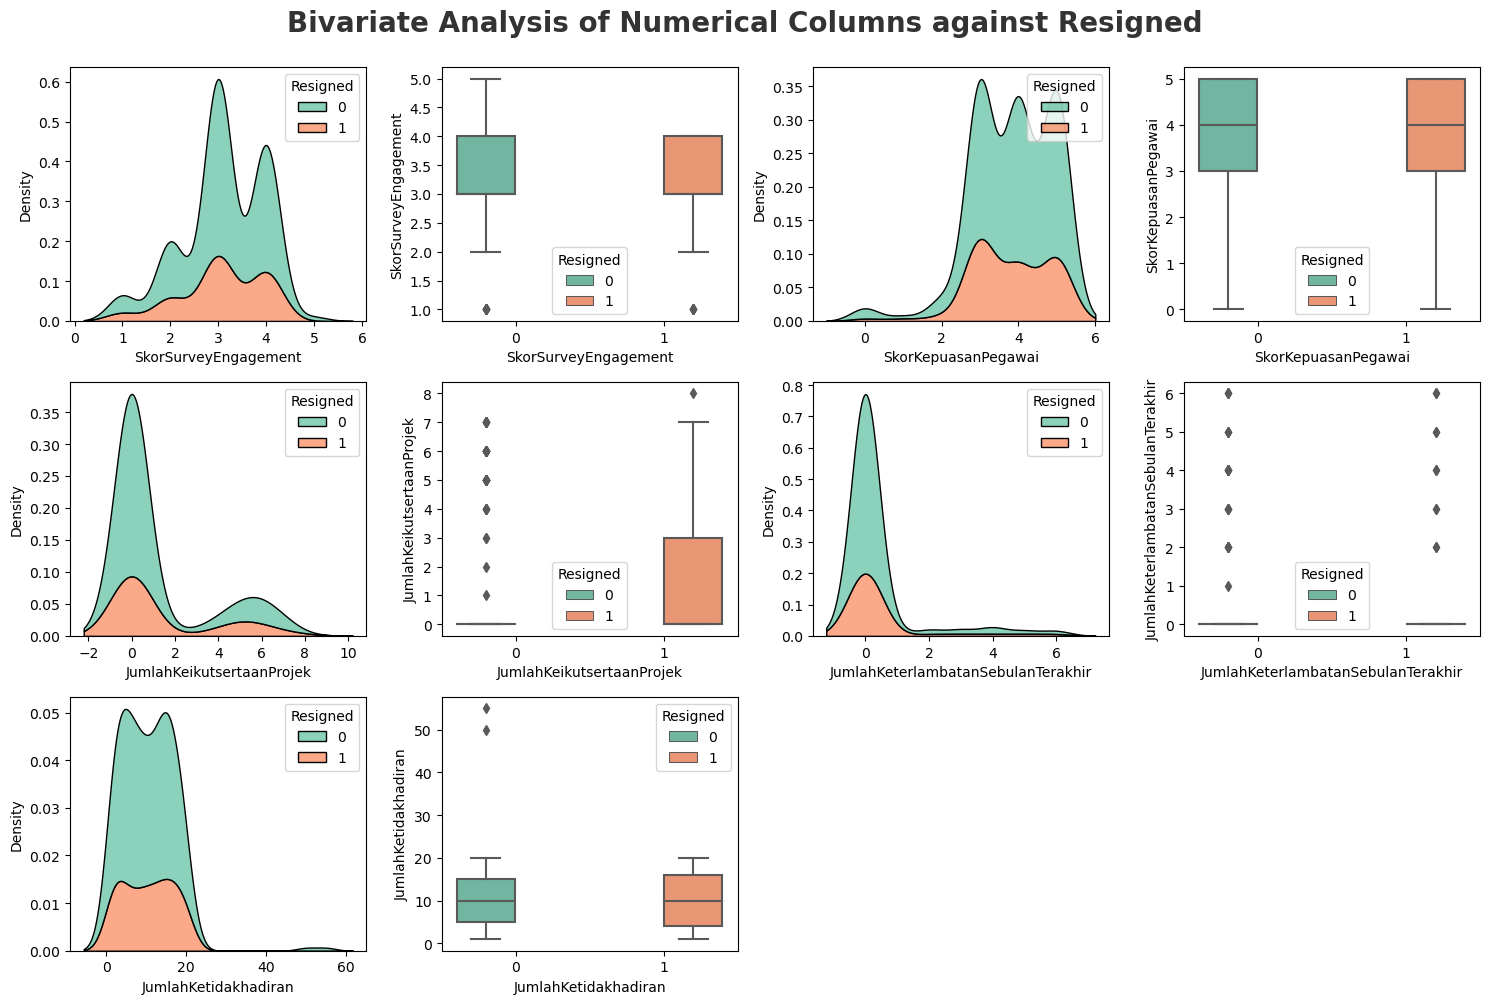

In [24]:
plt.figure(figsize=(15, 10))
plt.suptitle('Bivariate Analysis of Numerical Columns against Resigned', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE dan Box plot untuk setiap kolom numerikal dengan target 'Resigned'
for i, col in enumerate(nums):
    plt.subplot(3, 4, 2*i+1)
    sns.kdeplot(data=df_eda, x=col, hue='Resigned', fill=True, multiple='stack', palette='Set2')
    plt.xlabel(col)
    
    plt.subplot(3, 4, 2*i+2)
    sns.boxplot(data=df_eda, x='Resigned', y=col, hue='Resigned', palette='Set2')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

### Categorical

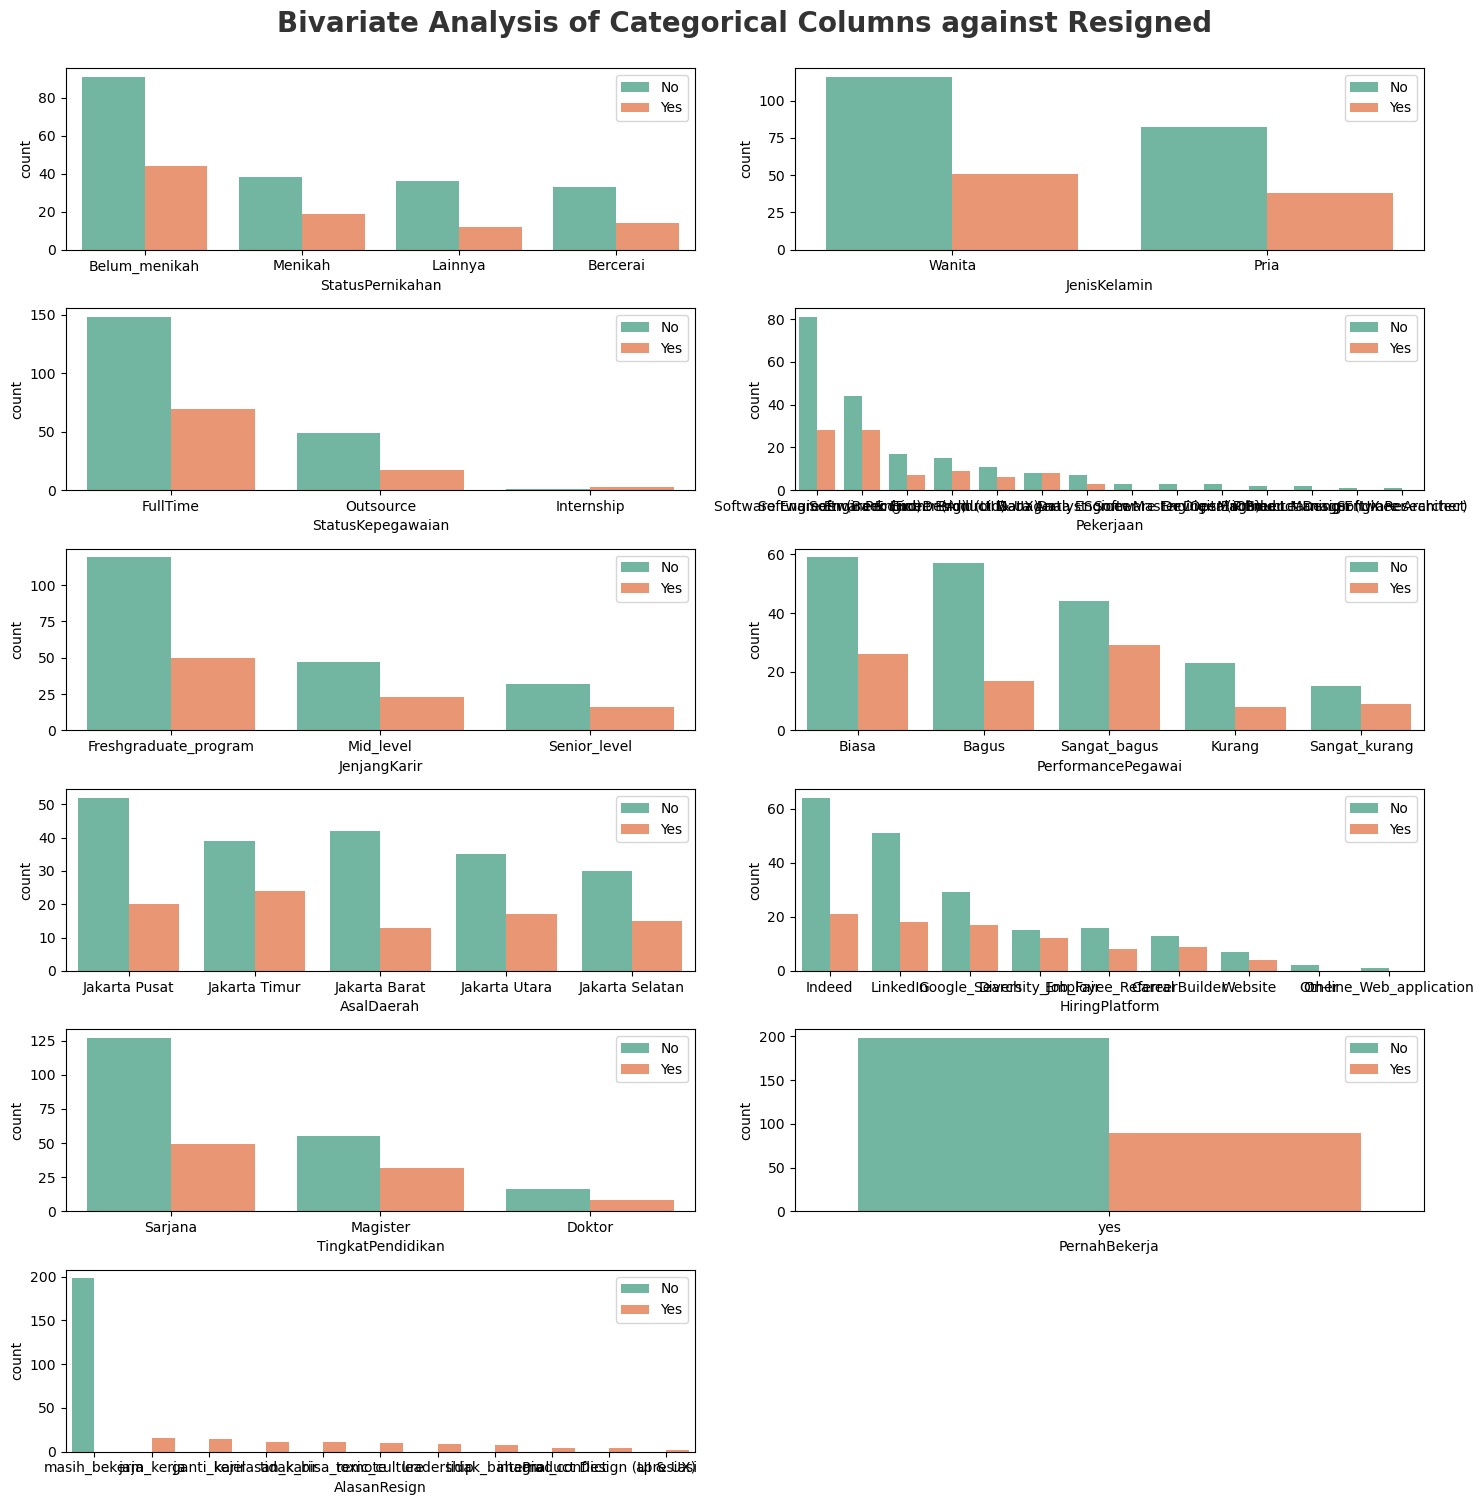

In [25]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Categorical Columns against Resigned', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cats)):
    plt.subplot(6, 2, i+1)
    sorted_vals = df_eda[cats[i]].value_counts().index
    ax = sns.countplot(x=df_eda[cats[i]], hue=df_eda['Resigned'], order=sorted_vals, palette='Set2') 
    plt.legend(['No', 'Yes'])

plt.tight_layout()
plt.show()

## Business Insight

In [26]:
df_eda['TahunHiring'] = df_eda['TanggalHiring'].dt.year

In [27]:
df_eda['TahunResign'] = df_eda['TanggalResign'].dt.year

In [28]:
df_prep['TanggalResign'].isna().sum()

0

In [29]:
df_hiring = df_eda[['TahunHiring','EnterpriseID']].groupby('TahunHiring').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'TahunHiring':'Tahun','EnterpriseID':'JumlahHiring'})
df_hiring = df_hiring.append({'Tahun': 2019, 'JumlahHiring': 0}, ignore_index=True)
df_hiring = df_hiring.append({'Tahun': 2020, 'JumlahHiring': 0}, ignore_index=True)
df_hiring.head()

,Tahun,JumlahHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8


In [30]:
df_resign = df_eda[['TahunResign','EnterpriseID']].groupby('TahunResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'TahunResign':'Tahun','EnterpriseID':'JumlahResign'})
df_resign['Tahun'] = df_resign['Tahun'].astype(int)
df_resign = df_resign.append({'Tahun': 2019, 'JumlahResign': 0}, ignore_index=True)
df_resign = df_resign.append({'Tahun': 2020, 'JumlahResign': 0}, ignore_index=True)
df_resign

,Tahun,JumlahResign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6
8,2019,0
9,2020,0


In [31]:
df_turnover = df_hiring.merge(df_resign, how='left', on = 'Tahun')
df_turnover = df_turnover.fillna(0)  # Mengganti nilai NaN dengan 0
df_turnover

,Tahun,JumlahHiring,JumlahResign
0,2006,1,0.0
1,2007,2,0.0
2,2008,2,0.0
3,2009,7,0.0
4,2010,8,0.0
5,2011,76,0.0
6,2012,41,0.0
7,2013,43,5.0
8,2014,56,12.0
9,2015,31,8.0


In [32]:
df_turnover['TotalPerubahanKaryawan'] = df_turnover['JumlahHiring'] - df_turnover['JumlahResign']

In [33]:
total_karyawan = 0
list_jumlah_karyawan = []
for i in range(len(df_turnover)):
    total_karyawan += df_turnover['TotalPerubahanKaryawan'][i]
    list_jumlah_karyawan.append(total_karyawan)
print(list_jumlah_karyawan)

[1.0, 3.0, 5.0, 12.0, 20.0, 96.0, 137.0, 175.0, 219.0, 242.0, 248.0, 234.0, 209.0, 204.0, 204.0, 198.0, 198.0]


In [34]:
df_turnover['TotalKaryawan'] = list_jumlah_karyawan
df_turnover

,Tahun,JumlahHiring,JumlahResign,TotalPerubahanKaryawan,TotalKaryawan
0,2006,1,0.0,1.0,1.0
1,2007,2,0.0,2.0,3.0
2,2008,2,0.0,2.0,5.0
3,2009,7,0.0,7.0,12.0
4,2010,8,0.0,8.0,20.0
5,2011,76,0.0,76.0,96.0
6,2012,41,0.0,41.0,137.0
7,2013,43,5.0,38.0,175.0
8,2014,56,12.0,44.0,219.0
9,2015,31,8.0,23.0,242.0


In [35]:
total_hiring = 0
list_total_hiring = []
for i in range(len(df_turnover)):
    total_hiring += df_turnover['JumlahHiring'][i]
    list_total_hiring.append(total_hiring)
print(list_total_hiring)
df_turnover['TotalHiring'] = list_total_hiring
df_turnover

[1, 3, 5, 12, 20, 96, 137, 180, 236, 267, 281, 286, 287, 287, 287, 287, 287]


,Tahun,JumlahHiring,JumlahResign,TotalPerubahanKaryawan,TotalKaryawan,TotalHiring
0,2006,1,0.0,1.0,1.0,1
1,2007,2,0.0,2.0,3.0,3
2,2008,2,0.0,2.0,5.0,5
3,2009,7,0.0,7.0,12.0,12
4,2010,8,0.0,8.0,20.0,20
5,2011,76,0.0,76.0,96.0,96
6,2012,41,0.0,41.0,137.0,137
7,2013,43,5.0,38.0,175.0,180
8,2014,56,12.0,44.0,219.0,236
9,2015,31,8.0,23.0,242.0,267


In [36]:
total_resign = 0
list_total_resign = []
for i in range(len(df_turnover)):
    total_resign += df_turnover['JumlahResign'][i]
    list_total_resign.append(total_resign)
print(list_total_resign)
df_turnover['TotalResign'] = list_total_resign
df_turnover

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 17.0, 25.0, 33.0, 52.0, 78.0, 83.0, 83.0, 89.0, 89.0]


,Tahun,JumlahHiring,JumlahResign,TotalPerubahanKaryawan,TotalKaryawan,TotalHiring,TotalResign
0,2006,1,0.0,1.0,1.0,1,0.0
1,2007,2,0.0,2.0,3.0,3,0.0
2,2008,2,0.0,2.0,5.0,5,0.0
3,2009,7,0.0,7.0,12.0,12,0.0
4,2010,8,0.0,8.0,20.0,20,0.0
5,2011,76,0.0,76.0,96.0,96,0.0
6,2012,41,0.0,41.0,137.0,137,0.0
7,2013,43,5.0,38.0,175.0,180,5.0
8,2014,56,12.0,44.0,219.0,236,17.0
9,2015,31,8.0,23.0,242.0,267,25.0


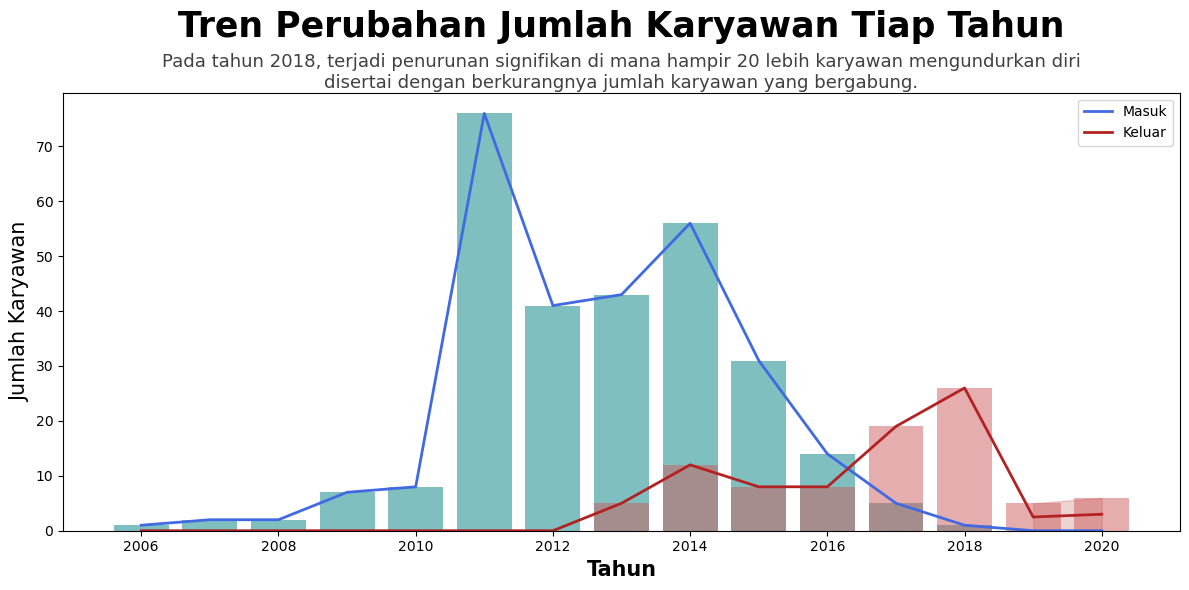

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

# Line and bar plot for incoming employees
sns.lineplot(data=df_turnover, x='Tahun', y='JumlahHiring', label='Masuk', lw=2, ax=ax, color='royalblue')
ax.bar(df_turnover['Tahun'], df_turnover['JumlahHiring'], color='teal', alpha=0.5)

# Line and Bar chart for outgoing employees
sns.lineplot(data=df_turnover, x='Tahun', y='JumlahResign',color='firebrick', label='Keluar', lw=2, ax=ax)
ax.bar(df_turnover['Tahun'], df_turnover['JumlahResign'], color='indianred', alpha=0.5)

# Set the title for the plot
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'Pada tahun 2018, terjadi penurunan signifikan di mana hampir 20 lebih karyawan mengundurkan diri\ndisertai dengan berkurangnya jumlah karyawan yang bergabung.'
plt.text((x_start+x_end)/2, y_end*1.01, desc, ha='center', fontsize=13, alpha=0.75)

# Set labels and title
ax.set_xlabel('Tahun', fontsize=15, fontweight='bold')
ax.set_ylabel('Jumlah Karyawan', fontsize=15)
ax.set_title('Tren Perubahan Jumlah Karyawan Tiap Tahun', fontsize=25, fontweight='bold', pad=40)

# Add legends for both line and bar chart
ax.legend()


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Resign Reason Analysis For Employee Attrition Management Strategy

In [38]:
#  Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign
resign_karyawan = df_eda[df_eda['Resigned']==1][['Pekerjaan', 'EnterpriseID']].groupby('Pekerjaan').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
unresign_karyawan = df_eda[df_eda['Resigned']==0][['Pekerjaan', 'EnterpriseID']].groupby('Pekerjaan').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahTidakResign'})

In [39]:
resign_karyawan

,Pekerjaan,JumlahResign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [40]:
unresign_karyawan

,Pekerjaan,JumlahTidakResign
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [41]:
# Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan 
job_resign_karyawan = unresign_karyawan.merge(resign_karyawan, how='outer', on='Pekerjaan')
job_resign_karyawan = job_resign_karyawan.fillna(0)  # Mengganti nilai NaN dengan 0
job_resign_karyawan

,Pekerjaan,JumlahTidakResign,JumlahResign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,0.0
3,Digital Product Manager,2,0.0
4,Machine Learning Engineer,2,0.0
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,0.0
7,Product Manager,11,6.0
8,Scrum Master,3,0.0
9,Software Architect,1,0.0


In [42]:
job_resign_karyawan['JumlahResign'] = job_resign_karyawan['JumlahResign'].astype('int64')
job_resign_karyawan

,Pekerjaan,JumlahTidakResign,JumlahResign
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Digital Product Manager,2,0
4,Machine Learning Engineer,2,0
5,Product Design (UI & UX),15,9
6,Product Design (UX Researcher),1,0
7,Product Manager,11,6
8,Scrum Master,3,0
9,Software Architect,1,0


In [43]:
# Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign)
job_resign_karyawan['TotalEmployee'] = job_resign_karyawan['JumlahResign'] + job_resign_karyawan['JumlahTidakResign']
job_resign_karyawan['PersentaseTidakResign'] = round((job_resign_karyawan['JumlahTidakResign'] / job_resign_karyawan['TotalEmployee']) * 100, 1)
job_resign_karyawan = job_resign_karyawan.sort_values(by='PersentaseTidakResign', ascending=False)
job_resign_karyawan

,Pekerjaan,JumlahTidakResign,JumlahResign,TotalEmployee,PersentaseTidakResign
2,DevOps Engineer,3,0,3,100.0
3,Digital Product Manager,2,0,2,100.0
4,Machine Learning Engineer,2,0,2,100.0
6,Product Design (UX Researcher),1,0,1,100.0
8,Scrum Master,3,0,3,100.0
9,Software Architect,1,0,1,100.0
13,Software Engineer (iOS),3,0,3,100.0
11,Software Engineer (Back End),81,28,109,74.3
10,Software Engineer (Android),17,7,24,70.8
1,Data Engineer,7,3,10,70.0


### Visualisasi Persentase Tidak Resign per Pekerjaan

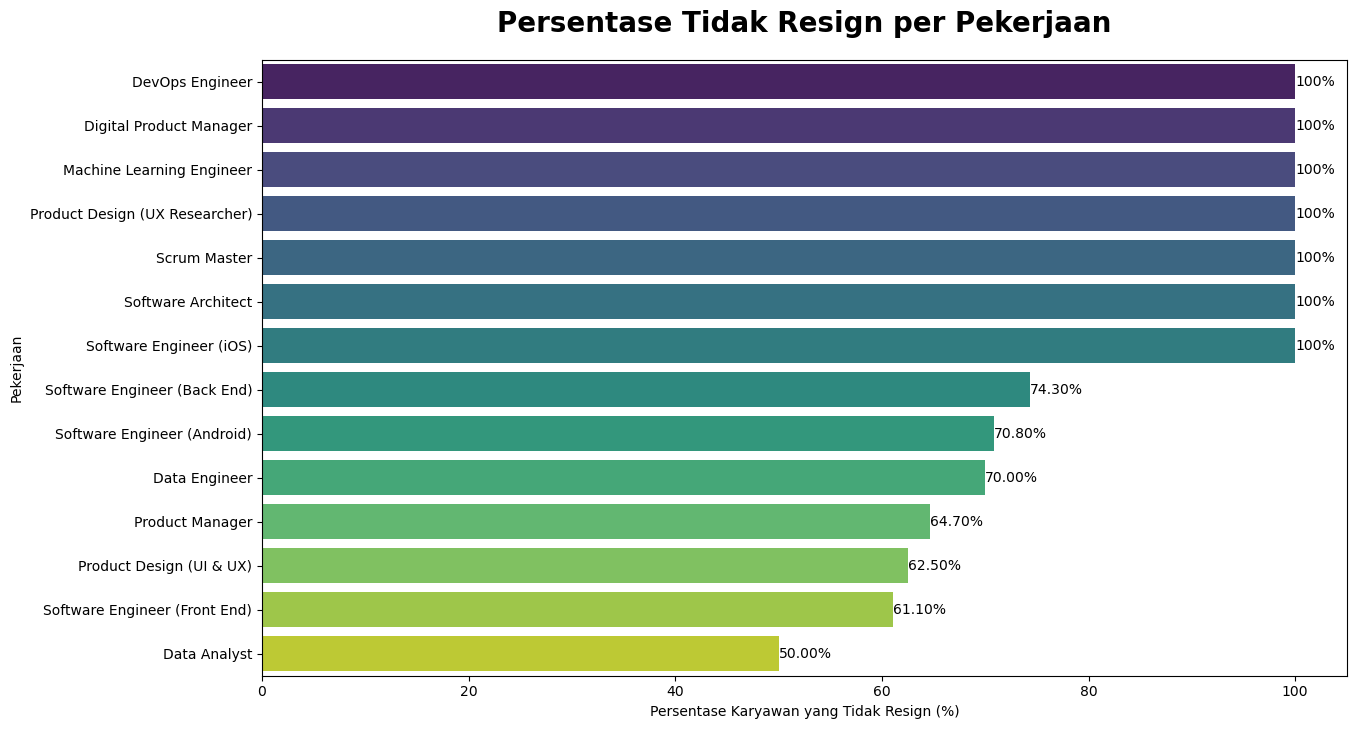

In [44]:
plt.figure(figsize=(14, 8))
sns.barplot(x='PersentaseTidakResign', y='Pekerjaan', data=job_resign_karyawan, palette='viridis')

# Tambahkan nilai persen di setiap bar
for index, value in enumerate(job_resign_karyawan['PersentaseTidakResign']):
    if value == 100:
        plt.text(value, index, f'{int(value)}%', va='center')
    else:
        plt.text(value, index, f'{value:.2f}%', va='center')

# Set the title for the plot
plt.title('Persentase Tidak Resign per Pekerjaan', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Persentase Karyawan yang Tidak Resign (%)')
plt.ylabel('Pekerjaan')
plt.show()

### Analisis Karyawan Resign Berdasarkan Performa, Alasan Resign, dan Jenjang Karir

In [45]:
df_resigned = df_eda[df_eda['Resigned'] == 1]
jenjangkarir_resign = df_resigned[['JenjangKarir','EnterpriseID']].groupby('JenjangKarir').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
performapegawai_resign = df_resigned[['PerformancePegawai','EnterpriseID']].groupby('PerformancePegawai').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
alasan_resign = df_resigned[['AlasanResign','EnterpriseID']].groupby('AlasanResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})

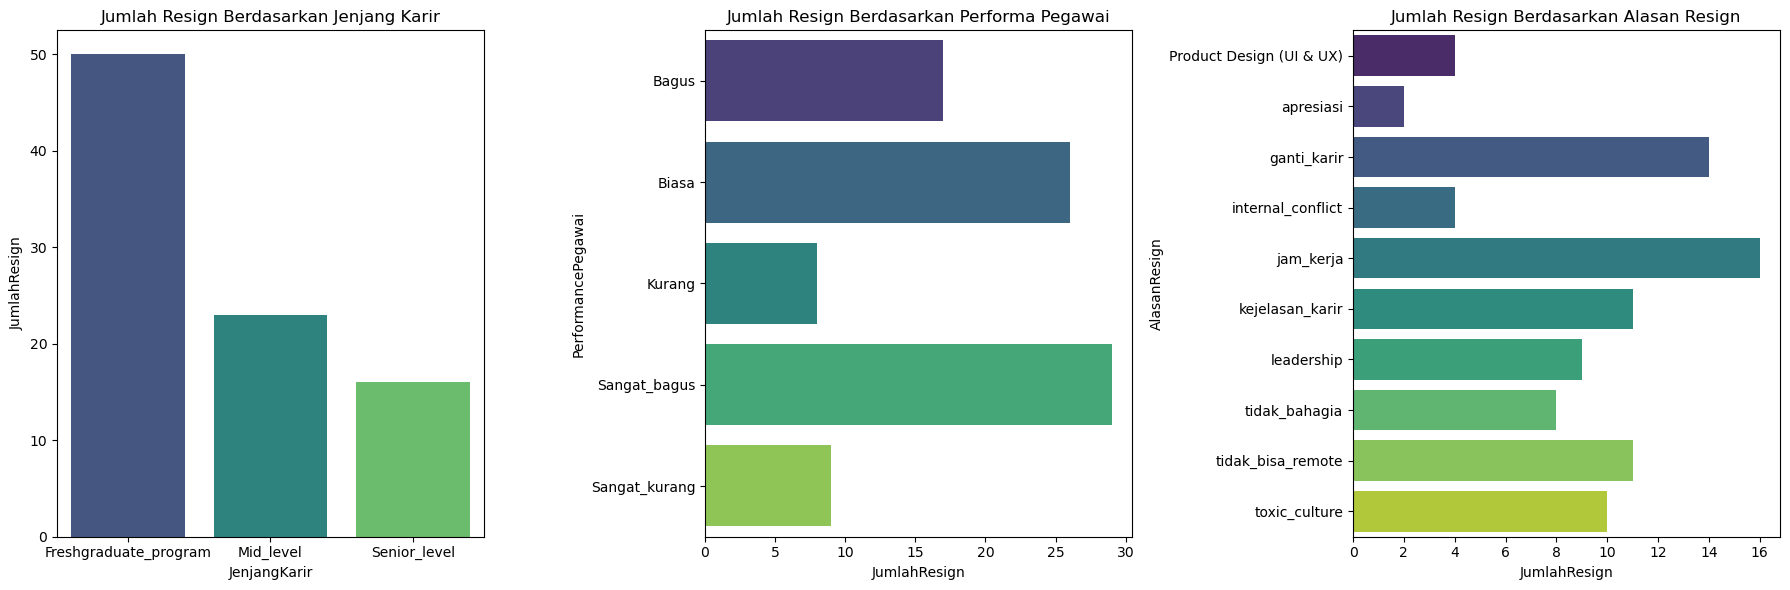

In [46]:
# Plot untuk Jenjang Karir
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='JenjangKarir', y='JumlahResign', data=jenjangkarir_resign, palette='viridis')
plt.title('Jumlah Resign Berdasarkan Jenjang Karir')

# Plot untuk Performa Pegawai
plt.subplot(1, 3, 2)
sns.barplot(x='JumlahResign', y='PerformancePegawai', data=performapegawai_resign, palette='viridis', orient='h')
plt.title('Jumlah Resign Berdasarkan Performa Pegawai')

# Plot untuk Alasan Resign
plt.subplot(1, 3, 3)
sns.barplot(x='JumlahResign', y='AlasanResign', data=alasan_resign, palette='viridis', orient='h')
plt.title('Jumlah Resign Berdasarkan Alasan Resign')

plt.tight_layout()
plt.show()

Tingkat resign di perusahaan terjadi di berbagai jenjang karir, dengan mayoritas terjadi pada program fresh graduate. Performa pegawai juga tidak menjadi faktor utama, karena terdapat resign dari berbagai tingkat performa. Alasan resign yang dominan adalah masalah jam kerja, keinginan untuk ganti karir, dan kurangnya kejelasan dalam karir. Selain itu, budaya kerja yang tidak sehat juga menjadi faktor penting dalam keputusan resign karyawan.

### Divisi yang memiliki tingkat resign tertinggi

In [47]:

df_se_backend = df_eda[(df_eda['Pekerjaan'] == 'Software Engineer (Back End)') & (df_eda['Resigned'] == 1)] 
df_se_backend['TahunResign'] = df_se_backend['TahunResign'].astype(int)
df_se_backend.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
11,grizzledSnipe7,111354,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,CareerBuilder,...,yes,0.0,tidak_bahagia,1989-07-18,2011-07-05,2016-02-06,2018-09-19,1,2011,2018
14,madWildfowl7,105507,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Selatan,Indeed,...,yes,0.0,ganti_karir,1983-08-27,2011-06-27,2016-03-10,2019-04-06,1,2011,2019
28,guiltySnail8,106577,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Selatan,Employee_Referral,...,yes,0.0,ganti_karir,1965-02-02,2013-11-11,2020-01-24,2015-06-15,1,2013,2015
49,needfulCardinal0,105390,Bercerai,Wanita,Outsource,Software Engineer (Back End),Senior_level,Bagus,Jakarta Timur,Indeed,...,yes,0.0,tidak_bahagia,1989-09-01,2014-07-07,2020-02-27,2015-01-07,1,2014,2015
65,boastfulLlama7,110454,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Pusat,Google_Search,...,yes,0.0,tidak_bahagia,1966-11-22,2011-08-15,2020-01-21,2018-06-08,1,2011,2018


In [48]:
jenjangkarir_se_backend_resign = df_se_backend[['JenjangKarir','EnterpriseID']].groupby('JenjangKarir').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
performapegawai_se_backend_resign = df_se_backend[['PerformancePegawai','EnterpriseID']].groupby('PerformancePegawai').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})
alasanresign_se_backend_resign = df_se_backend[['AlasanResign','EnterpriseID']].groupby('AlasanResign').agg({'EnterpriseID':'count'}).reset_index().rename(columns={'EnterpriseID':'JumlahResign'})

In [49]:
jenjangkarir_se_backend_resign

,JenjangKarir,JumlahResign
0,Freshgraduate_program,15
1,Mid_level,7
2,Senior_level,6


In [50]:
performapegawai_se_backend_resign

,PerformancePegawai,JumlahResign
0,Bagus,3
1,Biasa,9
2,Kurang,3
3,Sangat_bagus,11
4,Sangat_kurang,2


In [51]:
alasanresign_se_backend_resign

,AlasanResign,JumlahResign
0,Product Design (UI & UX),1
1,ganti_karir,4
2,internal_conflict,2
3,jam_kerja,6
4,kejelasan_karir,4
5,leadership,2
6,tidak_bahagia,5
7,tidak_bisa_remote,3
8,toxic_culture,1


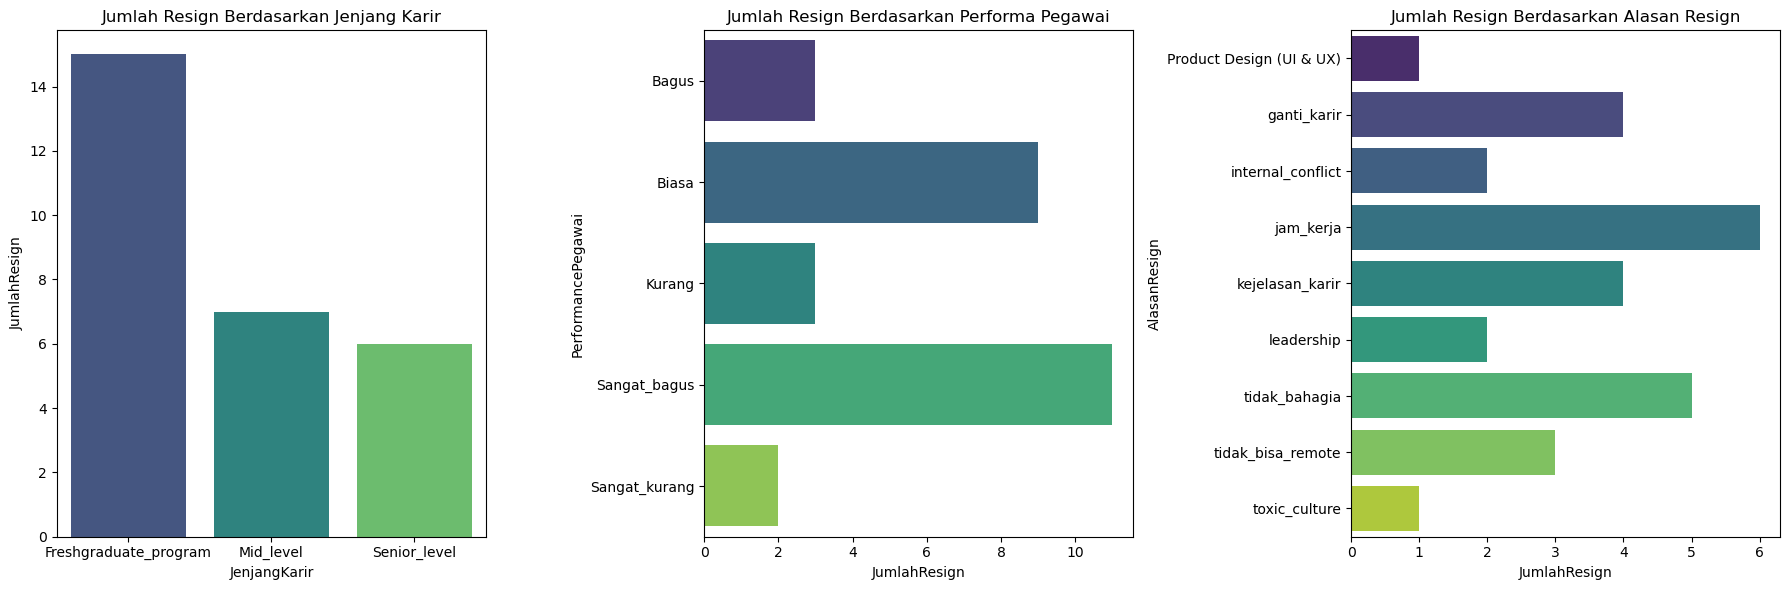

In [52]:
# Plot untuk Jenjang Karir
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=jenjangkarir_se_backend_resign, x='JenjangKarir', y='JumlahResign', palette='viridis')
plt.title('Jumlah Resign Berdasarkan Jenjang Karir')

# Plot untuk Performa Pegawai
plt.subplot(1, 3, 2)
sns.barplot(data=performapegawai_se_backend_resign, x='JumlahResign', y='PerformancePegawai', palette='viridis')
plt.title('Jumlah Resign Berdasarkan Performa Pegawai')

# Plot untuk Alasan Resign
plt.subplot(1, 3, 3)
sns.barplot(data=alasanresign_se_backend_resign, y='AlasanResign', x='JumlahResign', palette='viridis', orient='h')
plt.title('Jumlah Resign Berdasarkan Alasan Resign')

plt.tight_layout()
plt.show()

Berdasarkan chart di atas, divisi Software Engineer (Backend) mengalami tingkat resign yang cukup tinggi. Banyak yang mengundurkan diri dari program fresh graduate, meskipun ada yang memiliki performa bagus dan sangat bagus. Alasan resign jam kerja yang tidak sesuai, ketidakbahagiaan dalam bekerja, dan keinginan untuk ganti karir. Hal ini terlihat dari jumlah yang signifikan dari karyawan yang mengundurkan diri karena alasan tersebut, yaitu 15 orang dari total 28 orang yang mengundurkan diri dari program fresh graduate.

## Multivariate Analysis

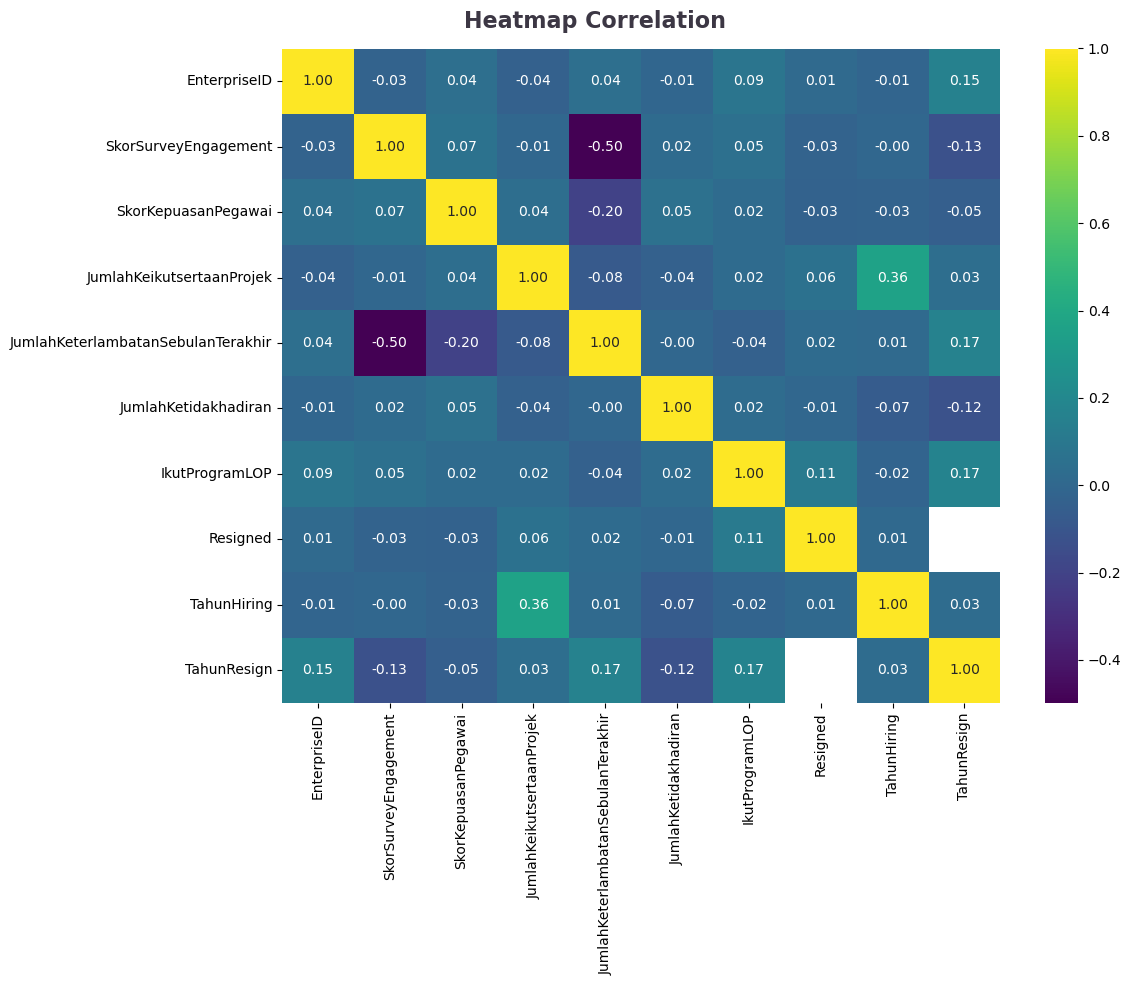

In [53]:
corr_matrix = df_eda.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Tampilkan plot
plt.show()

# Data Preprocessing 2

In [54]:
df_prep2 = df_eda.copy()

In [55]:
# Check missing values & duplicate values

check_items = []
for col in df_prep2.columns:
    check_items.append([col, df_prep2[col].dtype, df_prep2[col].isna().sum(), 100*df_prep2[col].isna().sum()/len(df_prep2[col]), df_prep2[col].nunique(), df_prep2[col].unique()[:5]])
df_desc = pd.DataFrame(data=check_items, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
# Check for duplicate rows
duplicates = df_prep2[df_prep2.duplicated()]
num_duplicates = len(duplicates)

# Add to the dataframe description
df_desc.loc[len(df_desc)] = ['Duplicate Rows', '-', num_duplicates, 100*num_duplicates/len(df_prep2), '-', '-']

# Display the updated description
df_desc

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Username,object,0,0.000000,285,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,EnterpriseID,int64,0,0.000000,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.000000,4,"[Belum_menikah, Menikah, Bercerai, Lainnya]"
3,JenisKelamin,object,0,0.000000,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.000000,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.000000,14,"[Software Engineer (Back End), Data Analyst, S..."
6,JenjangKarir,object,0,0.000000,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.000000,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,AsalDaerah,object,0,0.000000,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,HiringPlatform,object,0,0.000000,9,"[Employee_Referral, Website, Indeed, LinkedIn,..."


# Feature Engineering

In [56]:
df_feature = df_prep2.copy()

## Feature Selection

In [57]:
features = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'JenjangKarir', 'IkutProgramLOP', 'PerformancePegawai','Resigned']
df_feature = df_feature[features]

## Feature Encoding

In [58]:
df_feature['JenjangKarirEncoded'] = np.where(df_feature['JenjangKarir']=='Freshgraduate_program', 1,
                                             np.where(df_feature['JenjangKarir']=='Mid_level', 2, 3))
df_feature['PerformancePegawaiEncoded'] = np.where(df_feature['PerformancePegawai']=='Sangat_kurang', 1, 
                                                   np.where(df_feature['PerformancePegawai']=='Kurang', 2,
                                                            np.where(df_feature['PerformancePegawai']=='Biasa', 3,
                                                                     np.where(df_feature['PerformancePegawai']=='Bagus', 4, 5))))
df_feature = df_feature.drop(columns =['JenjangKarir', 'PerformancePegawai'])

In [59]:
df_feature[df_feature['JumlahKetidakhadiran']>20]

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,Resigned,JenjangKarirEncoded,PerformancePegawaiEncoded
12,4,3.0,0.0,0.0,50.0,0.0,0,1,3
115,4,5.0,0.0,0.0,55.0,0.0,0,2,3


In [60]:
df_feature = df_feature[df_feature['JumlahKetidakhadiran']<=20]

In [61]:
y = df_feature['Resigned']
X = df_feature.drop(columns=['Resigned'])

In [62]:
X.describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,JenjangKarirEncoded,PerformancePegawaiEncoded
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,3.094737,3.835088,1.175439,0.414035,10.143860,0.052632,1.578947,3.494737
std,0.835907,1.040126,2.291463,1.277023,5.863801,0.223690,0.763318,1.220774
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000,1.000000,3.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,1.000000,4.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000,0.000000,2.000000,5.000000
max,5.000000,5.000000,8.000000,6.000000,20.000000,1.000000,3.000000,5.000000


## Feature Transformation

In [63]:
from sklearn.preprocessing import MinMaxScaler

def normalization(df_feature):
    scaler = MinMaxScaler()
    df_feature_normalized = pd.DataFrame(scaler.fit_transform(df_feature), columns=df_feature.columns)
    return df_feature_normalized

X_norm = normalization(X)

In [64]:
X_norm.head()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,JenjangKarirEncoded,PerformancePegawaiEncoded
0,0.75,0.8,0.0,0.000000,0.421053,1.0,0.0,1.00
1,0.75,0.8,0.5,0.000000,0.105263,1.0,0.0,0.00
2,0.75,0.6,0.0,0.000000,0.526316,1.0,0.0,0.75
3,0.50,0.6,0.0,0.666667,0.263158,0.0,0.0,0.75
4,0.50,0.6,0.0,0.000000,0.526316,0.0,0.0,0.75


## Split Train & Test Data

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.3, random_state=42)

# Display the split details
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Total Samples: 285
Training Samples: 199 (69.82%)
Testing Samples: 86 (30.18%)


### Oversampling

In [66]:
from imblearn import over_sampling
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(X_train,y_train)

In [67]:
y_train_SMOTE.value_counts()

1    132
0    132
Name: Resigned, dtype: int64

In [68]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn import metrics

# Define dictionary of models
models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "LogisticRegressionCV": LogisticRegressionCV(random_state=42),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "XGB" : XGBClassifier()
}

In [69]:
# Create an empty list to store the metrics for each model
metrics_list = []

# Loop through each model
for model, clf in models.items():
    # Fit the model
    clf.fit(X_train, y_train.values.ravel())
    y_pred_train = clf.predict(X_train)
    y_pred_proba_train = clf.predict_proba(X_train)[:, 1]
    y_pred_test = clf.predict(X_test)
    y_pred_proba_test = clf.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    precission_train = metrics.precision_score(y_train, y_pred_train, pos_label=1)
    precission_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)
    recall_train = metrics.recall_score(y_train, y_pred_train, pos_label=1)
    recall_test = metrics.recall_score(y_test, y_pred_test, pos_label=1)
    f1_train = metrics.f1_score(y_train, y_pred_train, pos_label=1)
    f1_test = metrics.f1_score(y_test, y_pred_test, pos_label=1)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_proba_train, pos_label=1)
    auc_train = metrics.auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Append the metrics to the list
    metrics_list.append({
        "Model": model,
        "Accuracy Train": round(accuracy_train*100, 2),
        "Accuracy Test": round(accuracy_test*100, 2),
        "Precision Train": round(precission_train*100, 2),
        "Precision Test": round(precission_test*100, 2),
        "Recall Train": round(recall_train*100, 2),
        "Recall Test": round(recall_test*100, 2),
        "F1 Train": round(f1_train*100, 2),
        "F1 Test": round(f1_test*100, 2),
        "AUC Train": round(auc_train*100, 2),
        "AUC Test": round(auc_test*100, 2)
    })

# Create a dataframe from the list of metrics
metrics_df = pd.DataFrame(metrics_list)

# Display the dataframe
metrics_df


,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test,AUC Train,AUC Test
0,LogisticRegression,67.84,72.09,63.64,25.00,10.45,4.55,17.95,7.69,63.17,47.44
1,LogisticRegressionCV,66.33,74.42,0.00,0.00,0.00,0.00,0.00,0.00,62.58,48.37
2,DecisionTree,98.49,55.81,100.00,23.33,95.52,31.82,97.71,26.92,99.95,47.80
3,RandomForest,98.49,60.47,98.48,22.73,97.01,22.73,97.74,22.73,99.95,47.51
4,KNeighbors,77.39,62.79,68.97,27.27,59.70,27.27,64.00,27.27,82.37,47.94
5,AdaBoost,69.85,63.95,59.46,15.38,32.84,9.09,42.31,11.43,74.71,36.65
6,XGB,98.49,59.30,100.00,24.00,95.52,27.27,97.71,25.53,99.95,49.08


In [70]:
# Create an empty list to store the metrics for each model
metrics_list = []

# Loop through each model
for model, clf in models.items():
    # Fit the model
    clf.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())
    y_pred_train = clf.predict(X_train_SMOTE)
    y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:, 1]
    y_pred_test = clf.predict(X_test)
    y_pred_proba_test = clf.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy_train = metrics.accuracy_score(y_train_SMOTE, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    precission_train = metrics.precision_score(y_train_SMOTE, y_pred_train, pos_label=1)
    precission_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)
    recall_train = metrics.recall_score(y_train_SMOTE, y_pred_train, pos_label=1)
    recall_test = metrics.recall_score(y_test, y_pred_test, pos_label=1)
    f1_train = metrics.f1_score(y_train_SMOTE, y_pred_train, pos_label=1)
    f1_test = metrics.f1_score(y_test, y_pred_test, pos_label=1)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
    auc_train = metrics.auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
    auc_test = metrics.auc(fpr_test, tpr_test)

    # Append the metrics to the list
    metrics_list.append({
        "Model": model,
        "Accuracy Train": round(accuracy_train*100, 2),
        "Accuracy Test": round(accuracy_test*100, 2),
        "Precision Train": round(precission_train*100, 2),
        "Precision Test": round(precission_test*100, 2),
        "Recall Train": round(recall_train*100, 2),
        "Recall Test": round(recall_test*100, 2),
        "F1 Train": round(f1_train*100, 2),
        "F1 Test": round(f1_test*100, 2),
        "AUC Train": round(auc_train*100, 2),
        "AUC Test": round(auc_test*100, 2)
    })

# Create a dataframe from the list of metrics
metrics_df = pd.DataFrame(metrics_list)

# Display the dataframe
metrics_df


,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test,AUC Train,AUC Test
0,LogisticRegression,62.88,43.02,63.28,21.28,61.36,45.45,62.31,28.99,62.88,43.39
1,LogisticRegressionCV,62.12,44.19,62.12,24.00,62.12,54.55,62.12,33.33,62.15,42.26
2,DecisionTree,98.86,62.79,100.00,29.17,97.73,31.82,98.85,30.43,99.97,51.63
3,RandomForest,98.86,59.30,99.24,25.93,98.48,31.82,98.86,28.57,99.97,48.47
4,KNeighbors,81.44,59.30,76.10,31.43,91.67,50.00,83.16,38.60,91.14,50.82
5,AdaBoost,75.38,48.84,76.38,15.62,73.48,22.73,74.90,18.52,85.02,37.68
6,XGB,98.86,53.49,100.00,17.86,97.73,22.73,98.85,20.00,99.97,45.95


In [71]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: RandomForestClassifier(random_state=42)
Accuracy Train :98.86%
Accuracy Test :59.3%
Precission Train :99.24%
Precission Test :25.93%
Recall Train :98.48%
Recall Test :31.82%
F1 Train :98.86%
F1 Test :28.57%
AUC Test :99.97%
AUC Test :48.47%




## Confusion Matrix

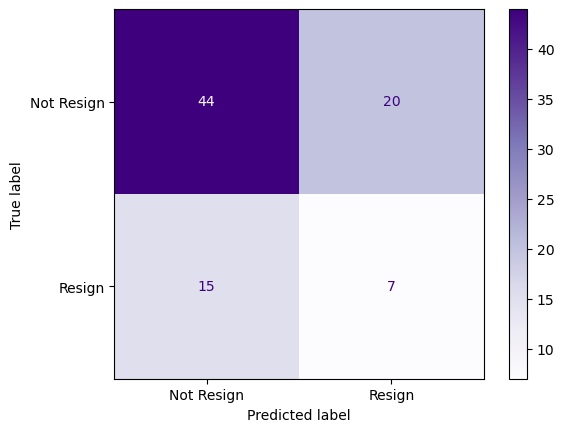

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Resign','Resign'])

cm_display.plot(cmap='Purples')
plt.show()

In [96]:
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[35 29]
 [16  6]]


## Feature Importance

Text(0.5, 1.0, 'feature importance score')

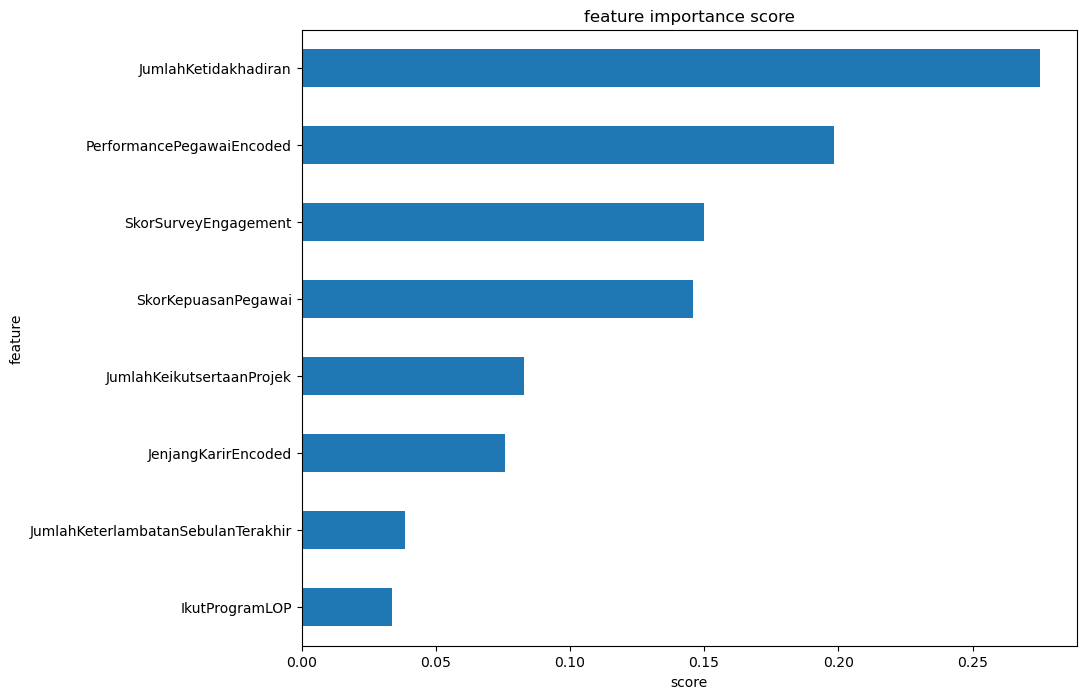

In [73]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [74]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(25)

print("Feature Importance:")
for feature, importance in top_features.items():
    print(f"{feature}: {importance}")

Feature Importance:
JumlahKetidakhadiran: 0.27500421329923147
PerformancePegawaiEncoded: 0.19849698232717708
SkorSurveyEngagement: 0.15002630882883408
SkorKepuasanPegawai: 0.14587106196154856
JumlahKeikutsertaanProjek: 0.08270773704566521
JenjangKarirEncoded: 0.07566026239836221
JumlahKeterlambatanSebulanTerakhir: 0.03837651501648539
IkutProgramLOP: 0.03385691912269609


Dari hasil feature importance, kita dapat melihat bahwa jumlah ketidakhadiran (absensi) merupakan fitur yang paling penting dalam memprediksi tingkat resignasi karyawan, diikuti oleh performa pegawai, skor kepuasan pegawai, dan skor survei engagement. Fitur-fitur ini memiliki pengaruh yang signifikan dalam model untuk memprediksi apakah seorang karyawan akan resign atau tidak. Fitur-fitur lain seperti jumlah keikutsertaan dalam proyek, jenjang karir, dan jumlah keterlambatan juga memiliki pengaruh, meskipun tidak sebesar fitur-fitur utama tersebut. Adanya program LOP juga mempengaruhi, meskipun dengan pengaruh yang lebih kecil.

In [76]:
# Define DataFrame
performance_log = pd.DataFrame(columns=["Experiment", "Accuracy", "Precission", "Recall", "AUC"])

# Define precission_test
precission_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)

# Add experiment result to DataFrame
pf = {
    "Experiment": "Initial Model (Random Forest)",
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(pf, ignore_index=True)
performance_log

,Experiment,Accuracy,Precission,Recall,AUC
0,Initial Model (Random Forest),59.3%,25.93%,31.82%,48.47%


## Tuning Hyperparameters

In [77]:
from sklearn.model_selection import GridSearchCV

hyperparams = dict(max_depth = [int(x) for x in np.linspace(5,20,15)],
                   min_samples_split = [int(x) for x in np.linspace(5,20,15)],
                   min_samples_leaf = [int(x) for x in np.linspace(5,20,15)],
                   criterion = ['gini', 'entropy'])

In [95]:
dtc = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(dtc, hyperparams)

clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014FE2C25610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014FE0C76910>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014FE0C75190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014FDF111550>})
Accuracy Train :87.88%
Accuracy Test :58.14%
Precission Train :89.68%
Precission Test :20.83%
Recall Train :85.61%
Recall Test :22.73%
F1 Train :87.6%
F1 Test :21.74%
AUC Test :95.42%
AUC Test :44.82%




In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter grid
hyperparams = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
clf = RandomizedSearchCV(rfc, hyperparams, n_iter=100, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

# Fit the model
clf.fit(X_train_SMOTE, y_train_SMOTE.values.ravel())

# Evaluation
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]

print("Evaluate model: {}".format(clf.best_estimator_))

accuracy_train = metrics.accuracy_score(y_train_SMOTE, y_pred_train)
print("Accuracy Train: {:.2f}%".format(accuracy_train*100))
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy Test: {:.2f}%".format(accuracy_test*100))

precision_train = metrics.precision_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("Precision Train: {:.2f}%".format(precision_train*100))
precision_test = metrics.precision_score(y_test, y_pred_test, pos_label=1)
print("Precision Test: {:.2f}%".format(precision_test*100))

recall_train = metrics.recall_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("Recall Train: {:.2f}%".format(recall_train*100))
recall_test = metrics.recall_score(y_test, y_pred_test, pos_label=1)
print("Recall Test: {:.2f}%".format(recall_test*100))

f1_train = metrics.f1_score(y_train_SMOTE, y_pred_train, pos_label=1)
print("F1 Train: {:.2f}%".format(f1_train*100))
f1_test = metrics.f1_score(y_test, y_pred_test, pos_label=1)
print("F1 Test: {:.2f}%".format(f1_test*100))

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train: {:.2f}%".format(auc_train*100))
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test: {:.2f}%".format(auc_test*100))
print("\n")

Evaluate model: RandomForestClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=19,
                       n_estimators=44, random_state=42)
Accuracy Train: 85.23%
Accuracy Test: 54.65%
Precision Train: 85.50%
Precision Test: 20.69%
Recall Train: 84.85%
Recall Test: 27.27%
F1 Train: 85.17%
F1 Test: 23.53%
AUC Train: 93.64%
AUC Test: 43.61%




In [81]:
for key, value in hyperparams.items() :
        print(key+':', clf.best_estimator_.get_params()[key])

n_estimators: 44
max_depth: 14
min_samples_split: 19
min_samples_leaf: 2
criterion: gini


In [88]:
clf = RandomForestClassifier(random_state=42, max_depth=14, min_samples_split=2, min_samples_leaf=19, criterion='gini')

clf.fit(X_train_SMOTE,y_train_SMOTE.values.ravel())
y_pred_train = clf.predict(X_train_SMOTE)
y_pred_proba_train = clf.predict_proba(X_train_SMOTE)[:,1]
y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)[:,1]
  
print("Evaluate model: {}".format(clf))

accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
accuracy_test = metrics.accuracy_score(y_test,y_pred_test)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')

precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train :" + str(round(precission_train*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred_test,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')

recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred_test,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')

f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred_test,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Test :"+str(round(auc_train*100,2))+'%')
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba_test, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test :"+str(round(auc_test*100,2))+'%')
print("\n")

Evaluate model: RandomForestClassifier(max_depth=14, min_samples_leaf=19, random_state=42)
Accuracy Train :71.97%
Accuracy Test :47.67%
Precission Train :72.31%
Precission Test :17.14%
Recall Train :71.21%
Recall Test :27.27%
F1 Train :71.76%
F1 Test :21.05%
AUC Test :81.15%
AUC Test :43.75%




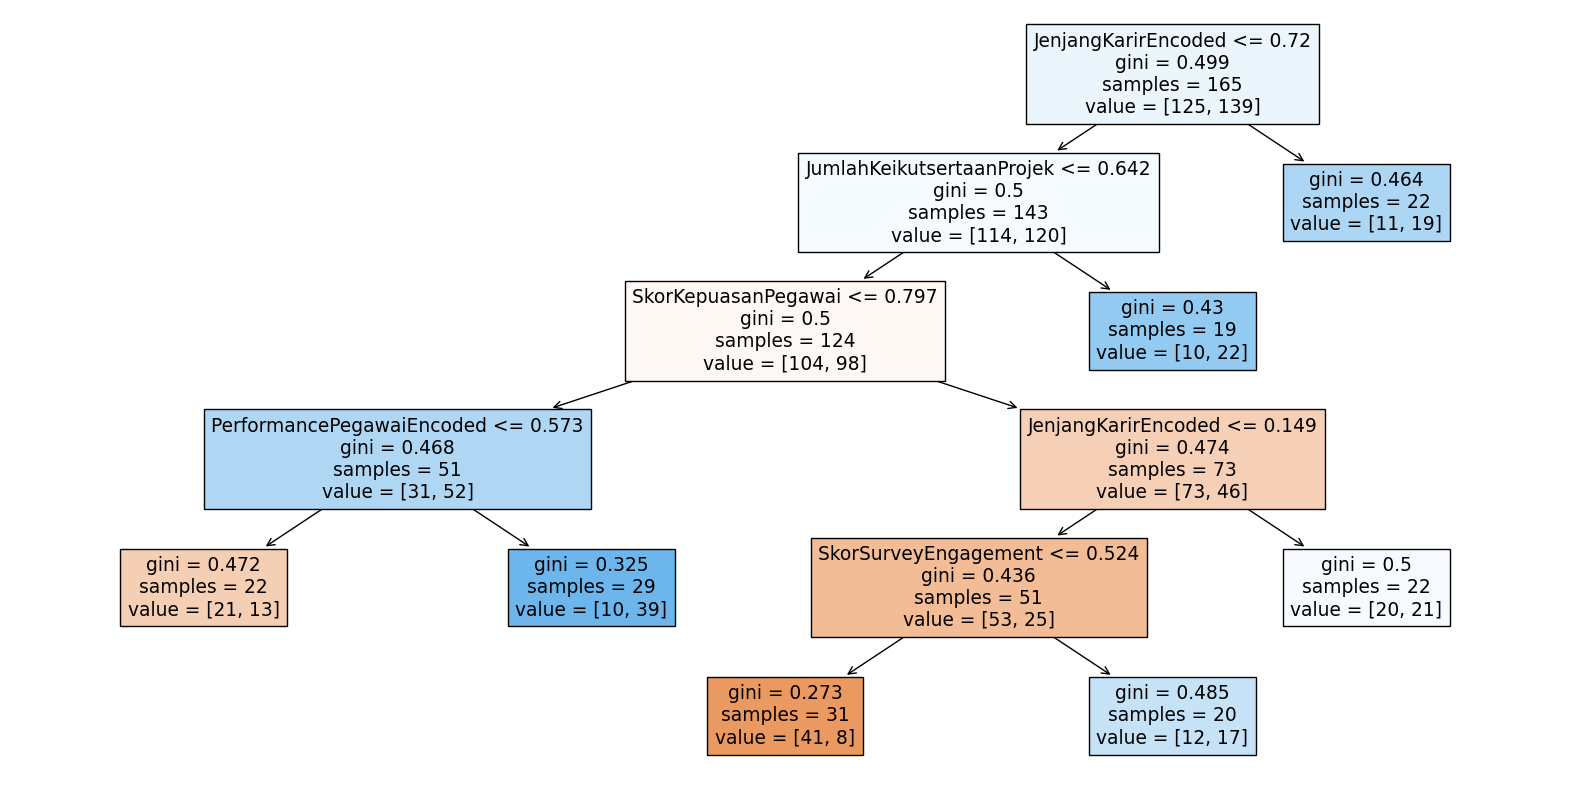

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Memilih satu pohon dari model RandomForestClassifier
one_tree = clf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=X.columns, filled=True, max_depth=14)
plt.show()

In [92]:
pf = {
    "Experiment": "Hyperparameter tuning (Random Forest)",
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "Recall": str(round(recall_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(pf, ignore_index=True)
performance_log

,Experiment,Accuracy,Precission,Recall,AUC
0,Initial Model (Random Forest),59.3%,25.93%,31.82%,48.47%
1,Hyperparameter tuning (Random Forest),47.67%,17.14%,27.27%,43.75%


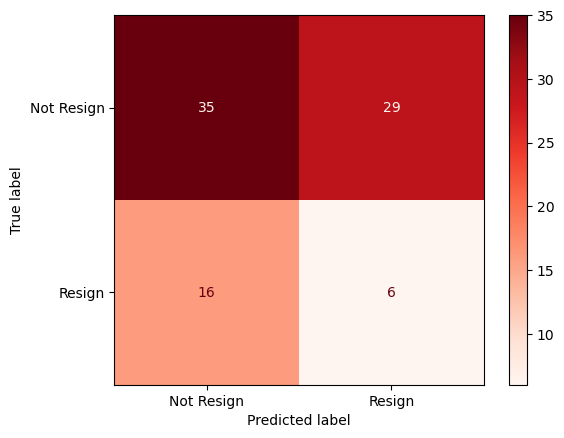

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Resign','Resign'])

cm_display.plot(cmap='Reds')
plt.show()

Text(0.5, 1.0, 'feature importance score')

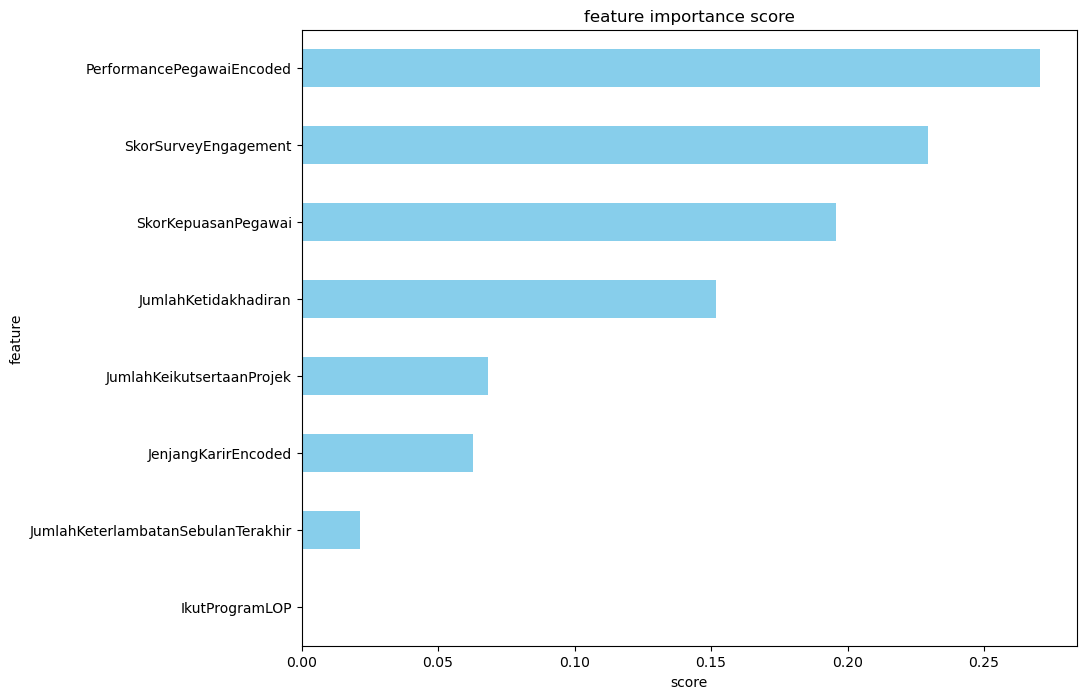

In [94]:
feat_importances_tuned = pd.Series(clf.feature_importances_, index=X.columns)
ax = feat_importances_tuned.nlargest(25).plot(kind='barh', figsize=(10, 8), color='skyblue')
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
